# Pregunta  1

El problema XOR es un problema de clasificación donde los datos, en este caso puntos en el rectángulo $[-1,1]\times[-1,1]$ poseen etiquetas correspondientes al resultado de la función lógica XOR dadas sus coordenadas espaciales. Por ejemplo, $ XOR(-1,-1) = -1$, $XOR(-0.56, 0) = 1$, y así. 

La regla XOR por lo tanto particiona el espacio en dos clases disjuntas, los cuadrantes 1 y 3 pertenecen a la clase donde $XOR(x_1,x_2) = -1$ (pues sus signos coinciden) y los cuadrantes 2 y 4 pertenecen a la clase donde $XOR(x_1, x_2) = 1$ (pues sus signos difieren). Dicho particionamiento hace que la clasificación sea un problema no linealmente separable.

## a) Generación de data para XOR

In [1]:
import numpy as np

In [49]:
def do_XOR(n=1000,noisy_n=100,svm=False):
    rng = np.random.RandomState(0)
    X_train = rng.uniform(low=-1.0,high=1.0,size=(n,2))
    Y_train = np.logical_xor(X_train[:,0] > 0, X_train[:,1] > 0)
    Y_train = 2*Y_train-1 if svm else Y_train
    X_noisy= rng.uniform(low=-0.8,high=0.2,size=(noisy_n,2))
    Y_noisy = -1*np.logical_xor(X_noisy[:,0] > 0, X_noisy[:,1] > 0) + 1
    Y_noisy = 2*Y_noisy-1 if svm else Y_noisy
    X_train = np.vstack((X_train, X_noisy))
    Y_train = np.hstack((Y_train, Y_noisy))
    X_test = rng.uniform(low=-1.0,high=1.0,size=(n,2))
    Y_test = np.logical_xor(X_test[:,0] > 0, X_test[:,1] > 0)
    Y_test = 2*Y_test - 1 if svm else Y_test
    return X_train,Y_train,X_test,Y_test

In [50]:
X_train, Y_train, X_test, Y_test = do_XOR()

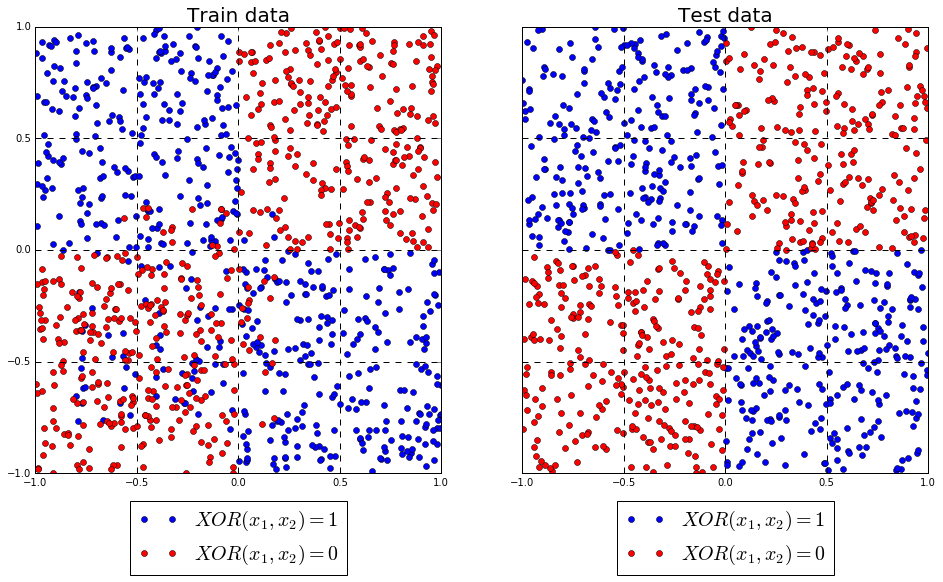

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(16,8))
ax1.set_title("Train data", fontsize=20)
ax1.grid(color='k', linestyle='--', linewidth=1)
class1 = Y_train == 1
class2 = Y_train == 0
ax1.plot(X_train[class1, 0], X_train[class1, 1], 'bo', label=r"$XOR(x_1, x_2) = 1$")
ax1.plot(X_train[class2, 0], X_train[class2, 1], 'ro', label=r"$XOR(x_1, x_2) = 0$")
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width, box.height])
plt.grid()
ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), fontsize=20)

ax2.set_title("Test data", fontsize=20)
ax2.grid(color='k', linestyle='--', linewidth=1)
class1 = Y_test == 1
class2 = Y_test == 0
ax2.plot(X_test[class1, 0], X_test[class1, 1], 'bo', label=r"$XOR(x_1, x_2) = 1$")
ax2.plot(X_test[class2, 0], X_test[class2, 1], 'ro', label=r"$XOR(x_1, x_2) = 0$")
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width, box.height])
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), fontsize=20)
plt.show()

## b) SVM Lineal para resolver XOR

In [145]:
def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type, title):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(20, 20))
    axis.set_title(title, fontsize=20)
    axis.scatter(X_train[:,0],X_train[:,1],s=5,c=Y_train,zorder=10,cmap='gray')
    axis.scatter(X_test[:,0],X_test[:,1],s=15,c=Y_test,zorder=10,cmap='gray')
    XX, YY = np.mgrid[-1:1:200j, -1:1:200j]
    if model_type == 'svm':
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    elif model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: raise ValueError('model type not supported')
    Z = Z.reshape(XX.shape)
    Zplot = Z > 0 if model_type == 'svm' else Z > 0.5
    axis.pcolormesh(XX, YY, Zplot ,cmap='YlGn')
    axis.contour(XX, YY, Z, alpha=1, colors=['k','k','k'],
    linestyles=['--', '--', '--'],levels=[-1, 0, 1])
    plt.show()

In [152]:
from sklearn.svm import LinearSVC

svms_group1 = []
svms_group2 = []
svms_group3 = []

for c in np.linspace(0.001, 1.0, 10):
    print "Resultados para c =",c
    svm = LinearSVC(C=c, penalty='l2', dual=False)
    svm.fit(X_train, Y_train)
    svms_group1.append(svm)
    print "\t Sin resolver problema dual, pérdida L2. \t Score:", svm.score(X_test, Y_test)
    
    svm = LinearSVC(C=c, penalty='l1', dual=False)
    svm.fit(X_train, Y_train)
    svms_group2.append(svm)
    print "\t Sin resolver problema dual, pérdida L1. \t Score:", svm.score(X_test, Y_test)
    
    svm = LinearSVC(C=c, penalty='l2', dual=True)
    svm.fit(X_train, Y_train)
    svms_group3.append(svm)
    print "\t Con resolver problema dual, pérdida L2. \t Score:", svm.score(X_test, Y_test)
    
    print 

Resultados para c = 0.001
	 Sin resolver problema dual, pérdida L2. 	 Score: 0.47
	 Sin resolver problema dual, pérdida L1. 	 Score: 0.489
	 Con resolver problema dual, pérdida L2. 	 Score: 0.47

Resultados para c = 0.112
	 Sin resolver problema dual, pérdida L2. 	 Score: 0.471
	 Sin resolver problema dual, pérdida L1. 	 Score: 0.49
	 Con resolver problema dual, pérdida L2. 	 Score: 0.471

Resultados para c = 0.223
	 Sin resolver problema dual, pérdida L2. 	 Score: 0.471
	 Sin resolver problema dual, pérdida L1. 	 Score: 0.48
	 Con resolver problema dual, pérdida L2. 	 Score: 0.471

Resultados para c = 0.334
	 Sin resolver problema dual, pérdida L2. 	 Score: 0.471
	 Sin resolver problema dual, pérdida L1. 	 Score: 0.48
	 Con resolver problema dual, pérdida L2. 	 Score: 0.471

Resultados para c = 0.445
	 Sin resolver problema dual, pérdida L2. 	 Score: 0.471
	 Sin resolver problema dual, pérdida L1. 	 Score: 0.477
	 Con resolver problema dual, pérdida L2. 	 Score: 0.471

Resultados para

En general el parámetro de regularización mejora debilmente el rendimiento de la SVM, por otra parte la SVM con pérdida L1 posee mejores resultados que utilizando pérdida L2, y no se observan diferencias entre resolver el problema en su forma dual o no. Naturalmente estos scores no indican un buen rendimiento, de hecho al haber dos clases es mejor lanzar una moneda al aire y adivinar la clase, antes que utilizar una SVM lineal.

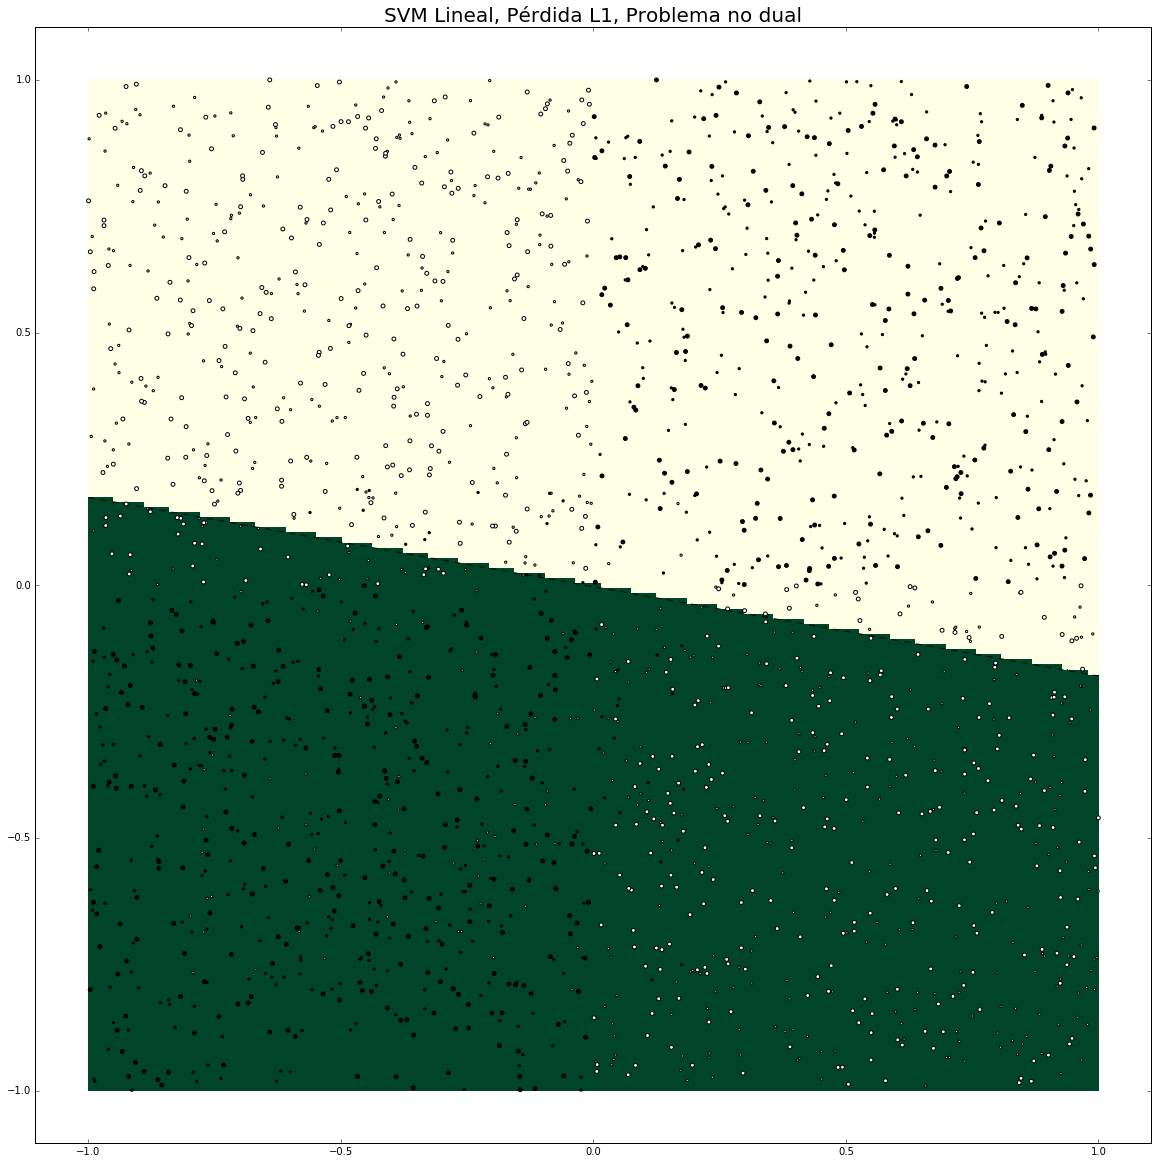

In [154]:
plot_classifier(svms_group2[1],X_train,Y_train,X_test,Y_test,'svm', u"SVM Lineal, Pérdida L1, Problema no dual")

Naturalmente la frontera generada es un hiperplano que no puede, por construcción, dividir las clases disjuntas destacadas en el gráfico. El mejor intento es un hiperplano rotado, probablemente, debido al ruido generado sobre el conjunto de entrenamiento. Si el conjunto de entrenamiento no tuviera ruido el hiperplano encontrado sería, por ejemplo, una partición exacta sobre $y = 0$.